

# **KNN Assignment**

# **Assignment 13(a)**

# ***1.Glass DataSet(glass.csv)***

# **Importing Libraries**

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Importing DataSet**

In [2]:
#importing dataset
glass=pd.read_csv('glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# **Exploratory Data Analysis**

In [3]:
glass.shape

(214, 10)

In [4]:
#checking missing values
(glass.isna().sum())/len(glass)*100

RI      0.0
Na      0.0
Mg      0.0
Al      0.0
Si      0.0
K       0.0
Ca      0.0
Ba      0.0
Fe      0.0
Type    0.0
dtype: float64

In [5]:
glass.isna().any()

RI      False
Na      False
Mg      False
Al      False
Si      False
K       False
Ca      False
Ba      False
Fe      False
Type    False
dtype: bool

In [6]:
#checking duplicates
glass.duplicated().sum()

1

In [7]:
glass[glass.duplicated].shape

(1, 10)

In [8]:
glass[glass.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [9]:
#drop duplicates
glass.drop_duplicates(inplace=True)

In [10]:
#after droping the duplicates the shape is 213
glass.shape

(213, 10)

In [11]:
glass.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [12]:
glass['Type'].nunique()

6

In [13]:
glass['Type'].unique()

array([1, 2, 3, 5, 6, 7])

In [14]:
glass['Type'].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [15]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [16]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


# **Correlation**

In [17]:
#correlation
glass.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


# **Visualization**

# **HeatMap**

<Axes: >

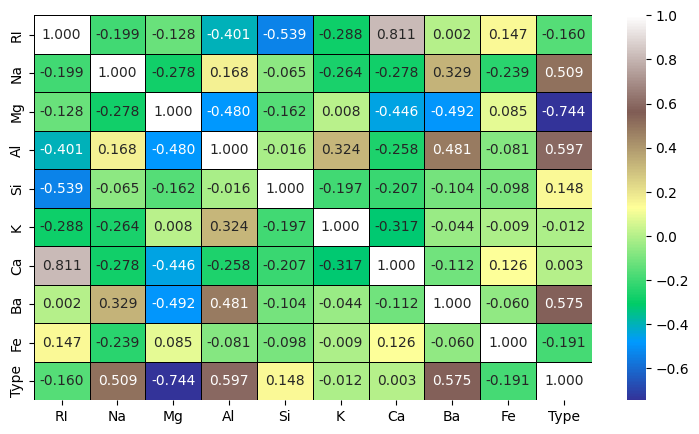

In [18]:
#heat map
plt.figure(figsize=(9,5))
sns.heatmap(glass.corr(),annot=True,cmap='terrain',fmt='.3f',linewidth=0.5,linecolor='black')

# **PairPlot**

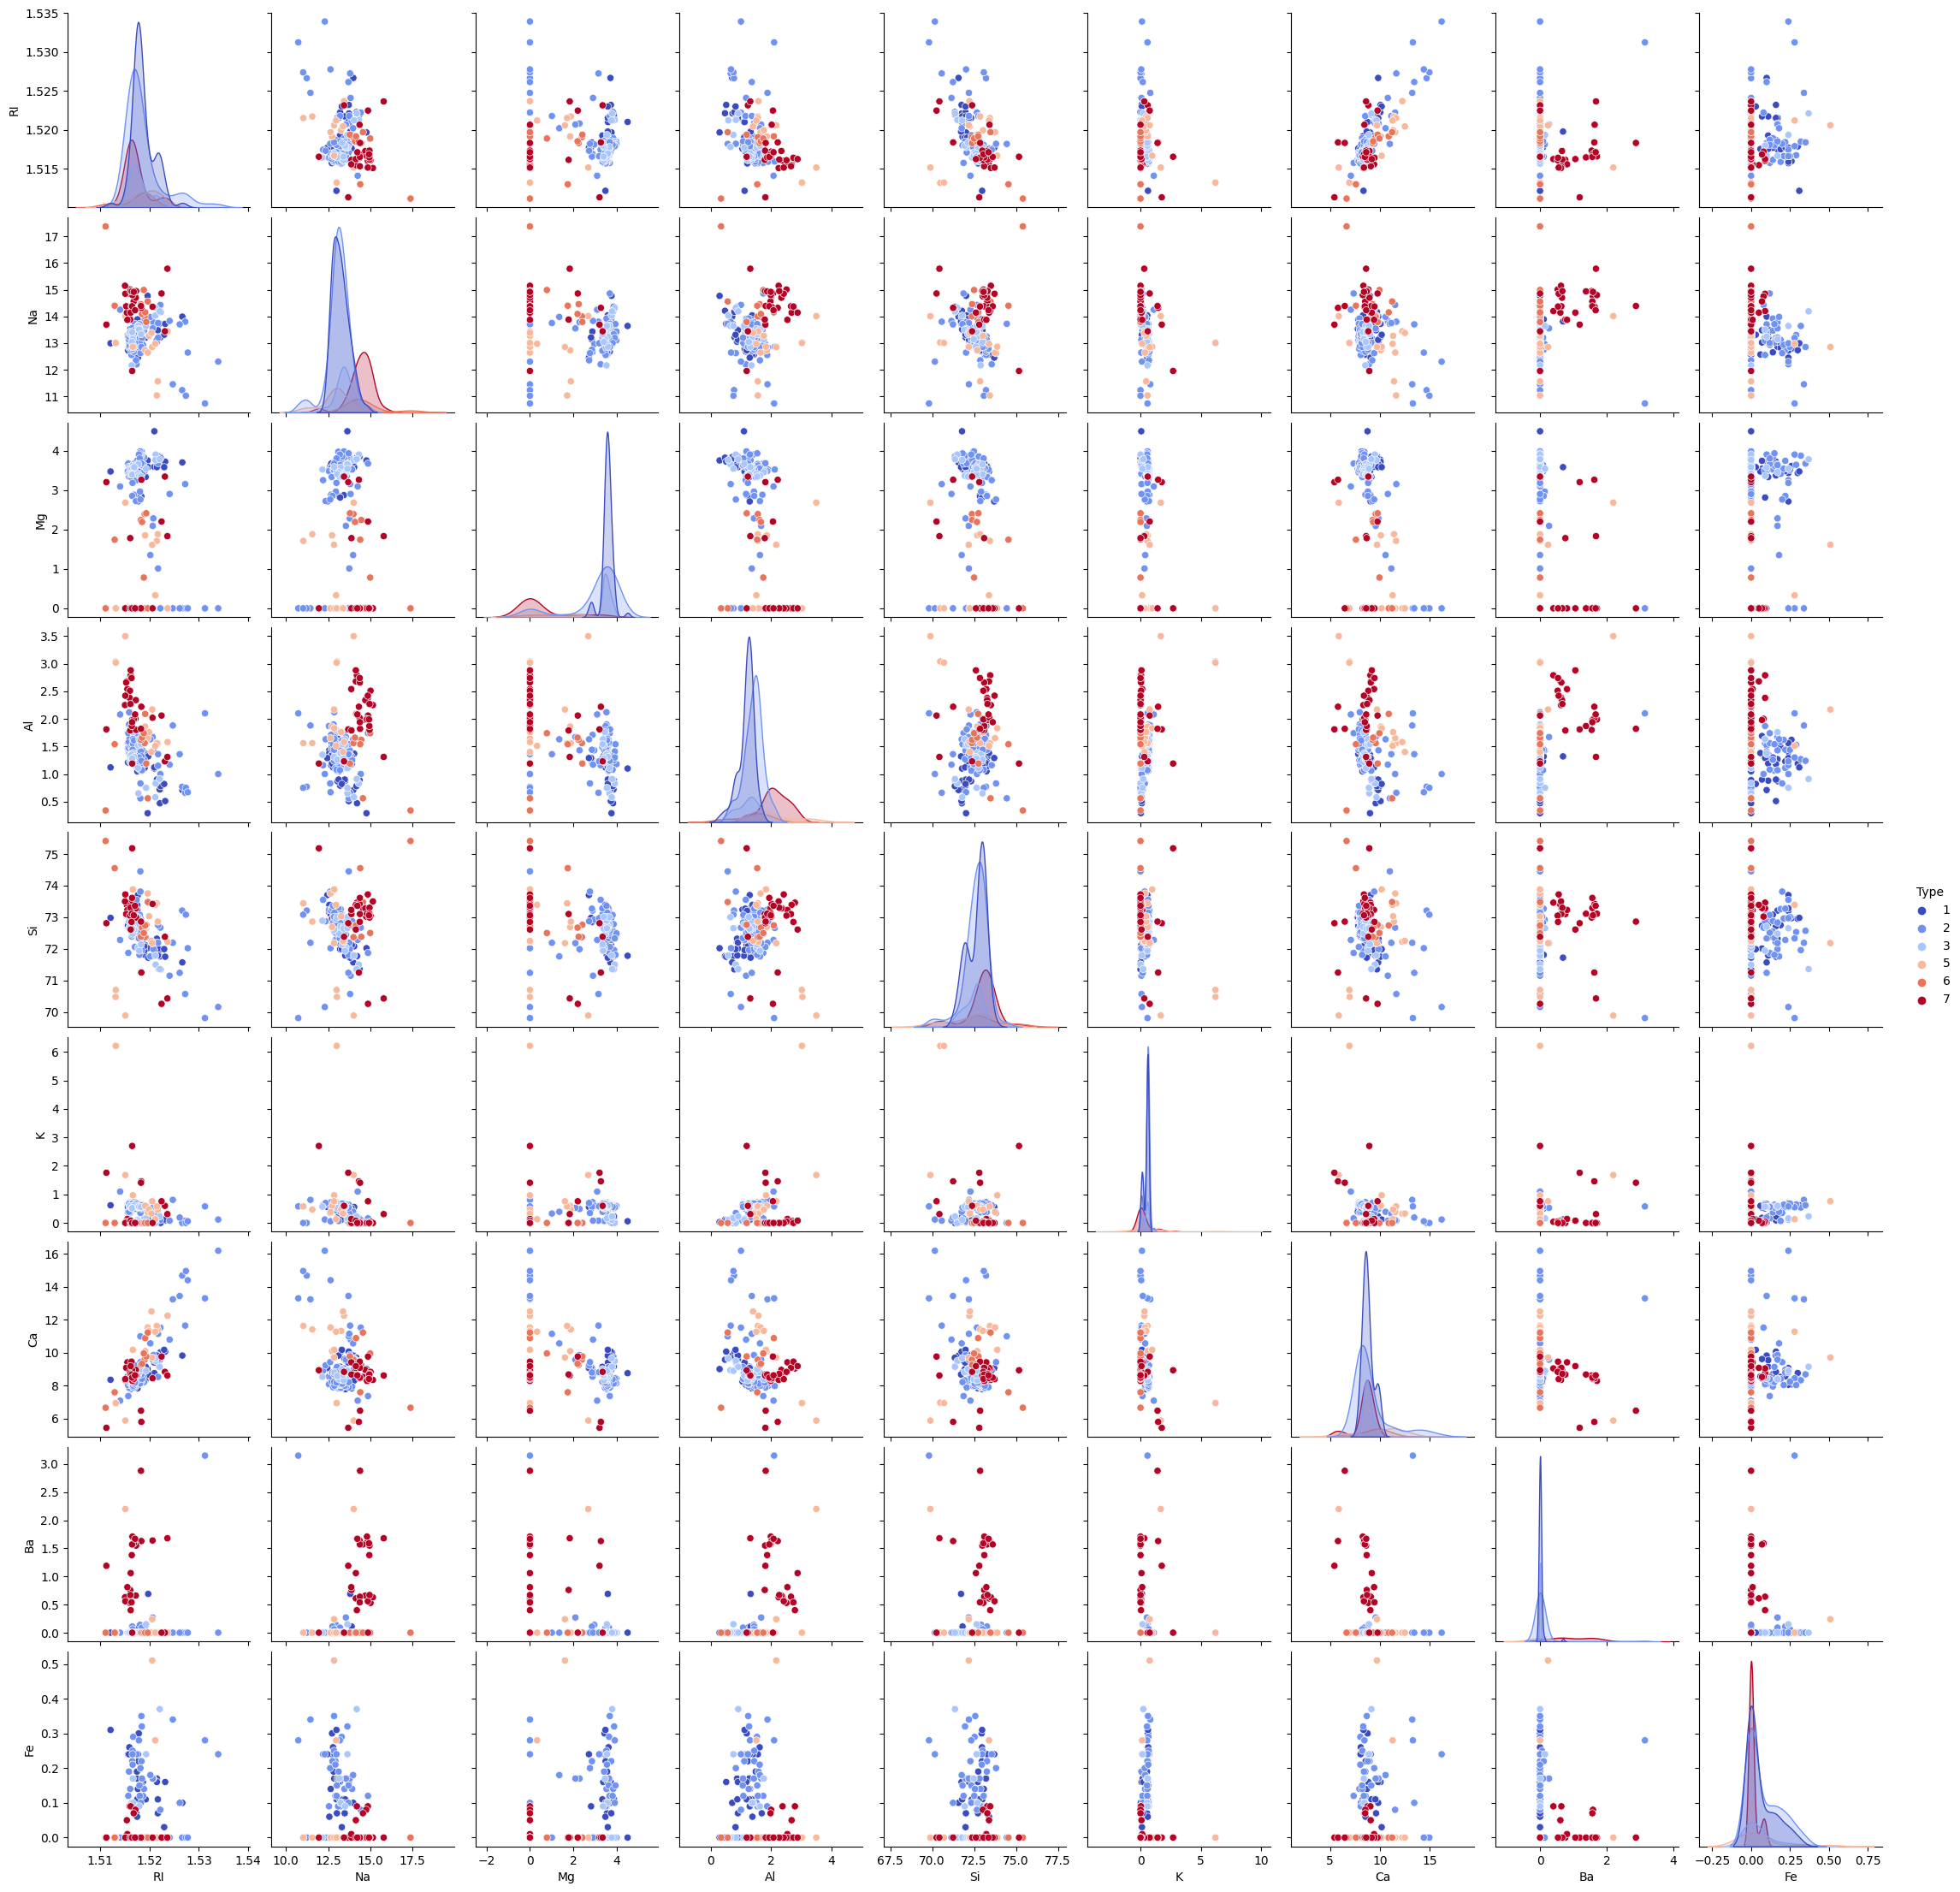

In [19]:
#pairplot
sns.pairplot(glass,hue='Type',palette='coolwarm')

# **Histogram**

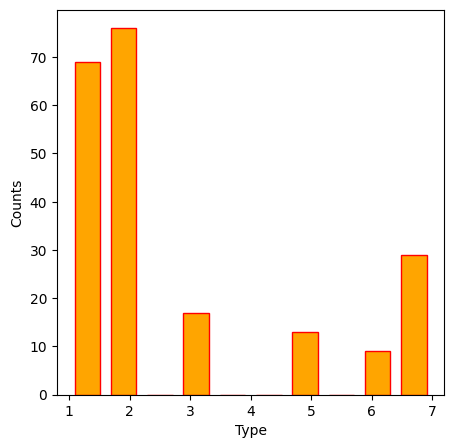

In [20]:
#histogram
plt.figure(figsize=(5,5))
plt.hist(glass['Type'],color='orange',edgecolor='red',rwidth=0.7)
plt.xlabel('Type')
plt.ylabel('Counts')
plt.show()

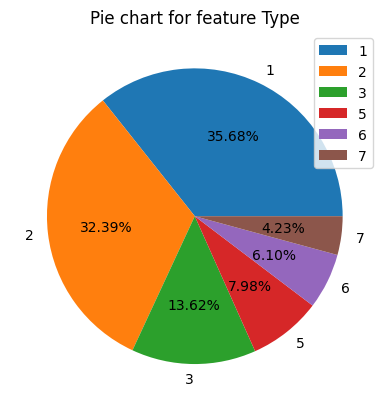

In [21]:
#pie chart
plt.pie(glass['Type'].value_counts(),labels=glass['Type'].unique(),autopct='%.2f%%')
plt.legend(loc='upper right')
plt.title('Pie chart for feature Type')
plt.show()

# **DensityPlot**

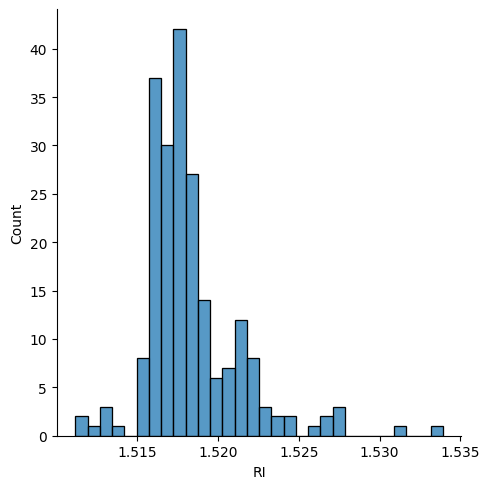

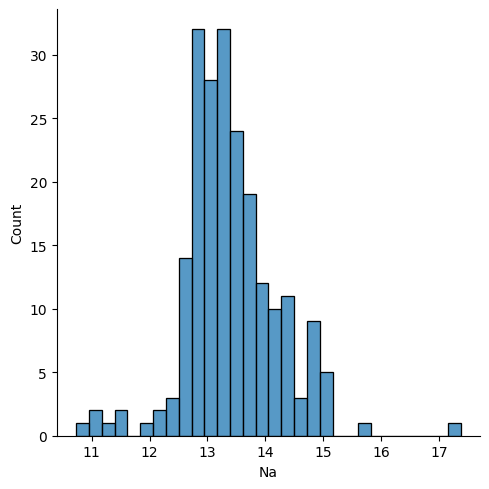

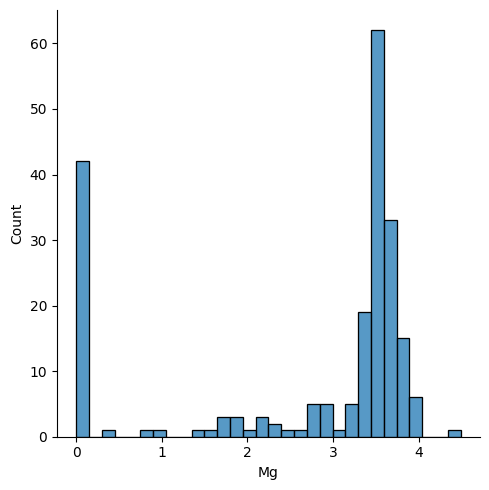

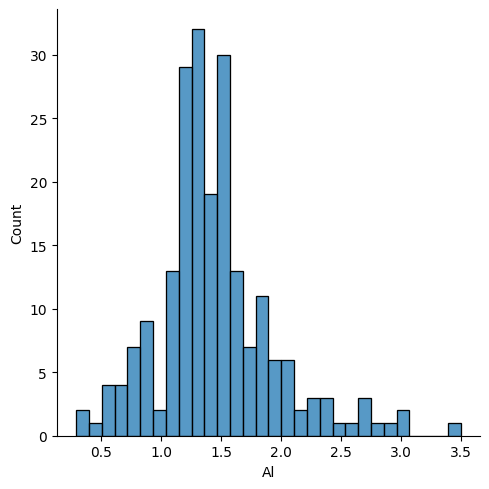

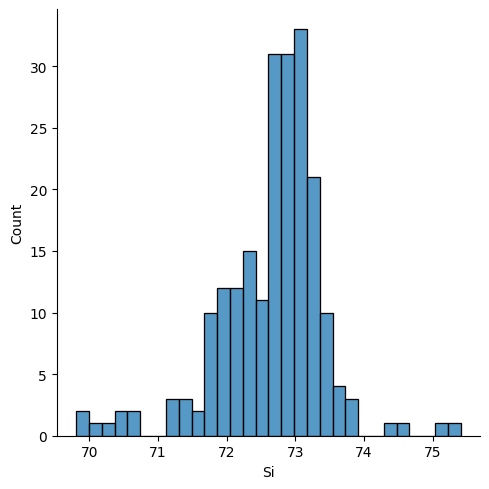

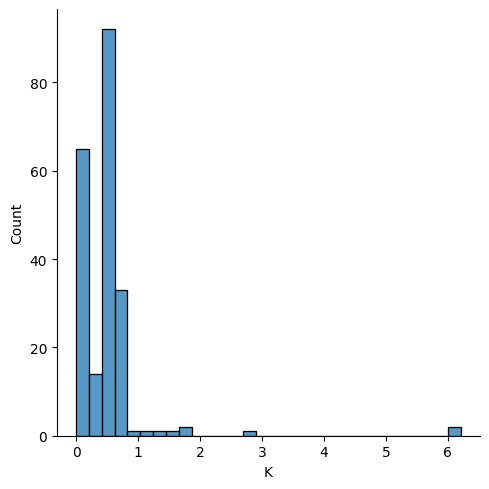

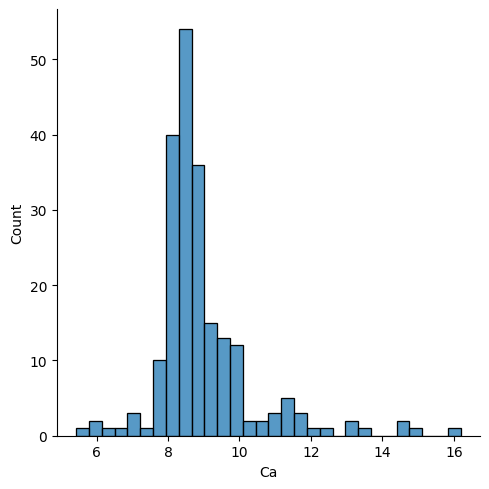

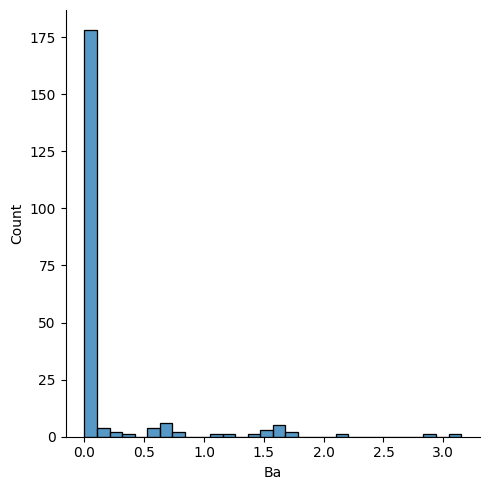

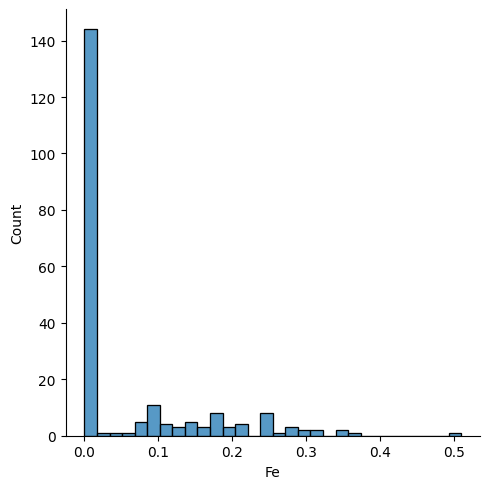

In [22]:
#distplot
feat=glass.columns[:-1]
for f in feat:
  sns.displot(glass[f],bins=30)
  plt.show()

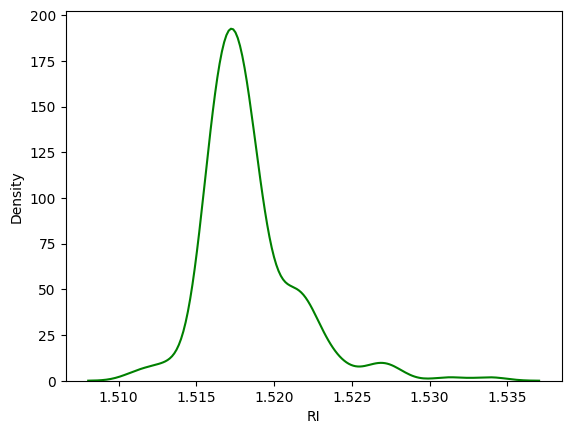

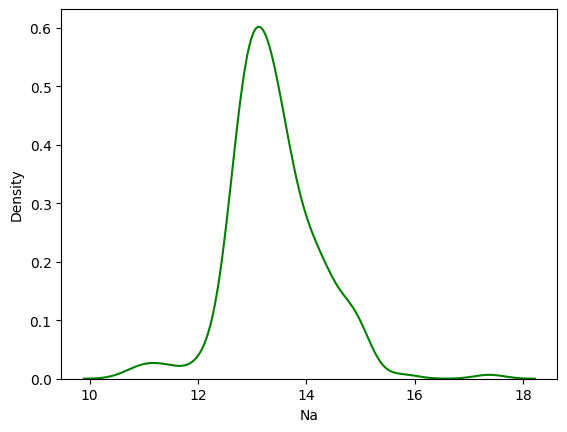

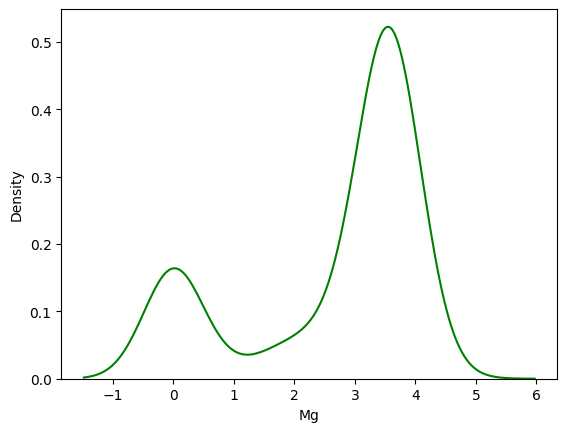

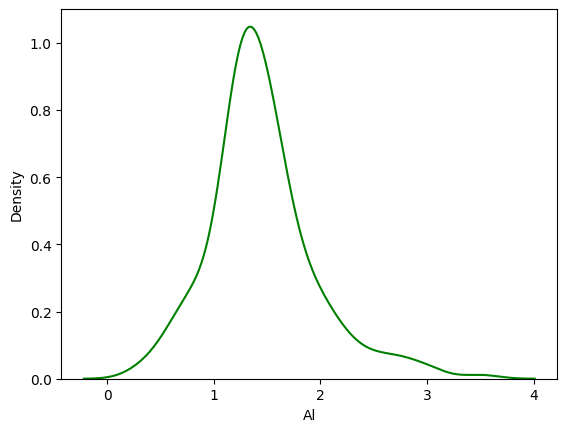

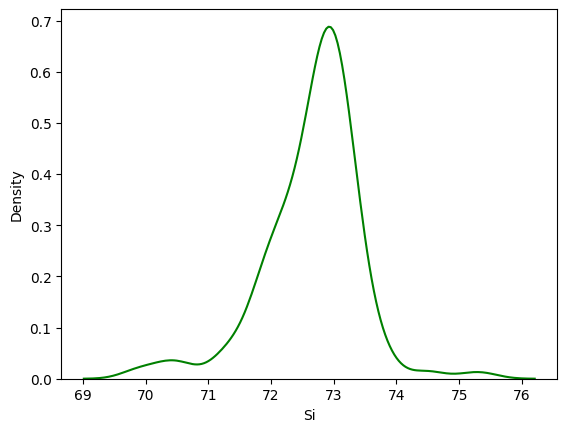

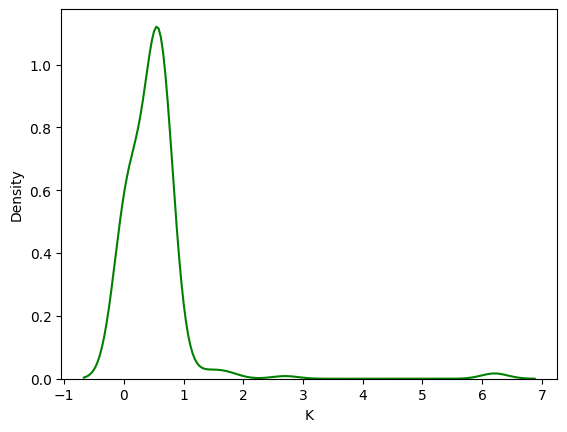

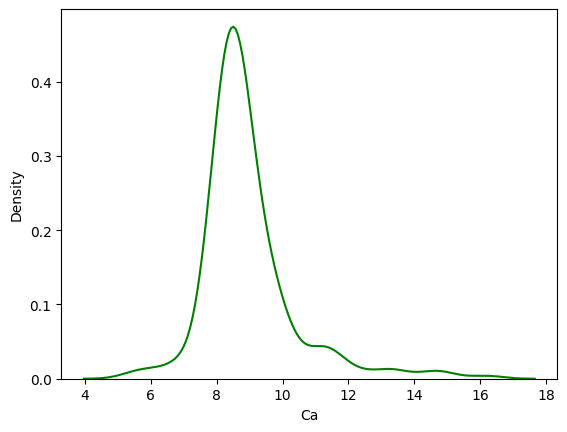

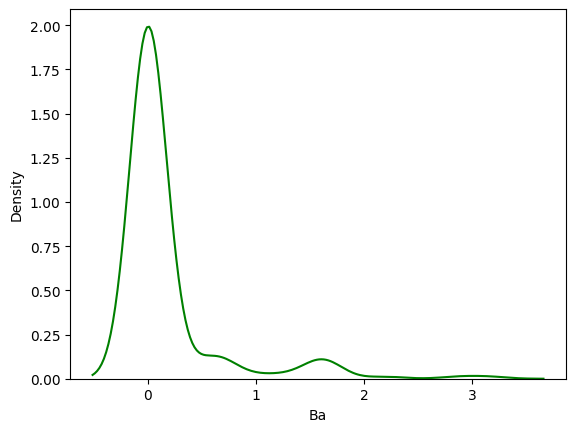

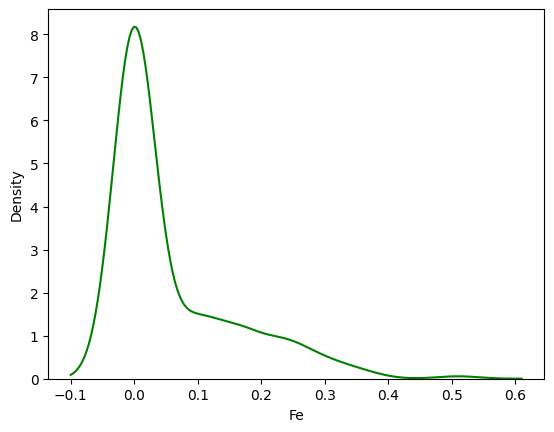

In [23]:
#kdeplot
feat=glass.columns[:-1]
for f in feat:
  sns.kdeplot(glass[f],color='green')
  plt.show()

# **Boxplot**

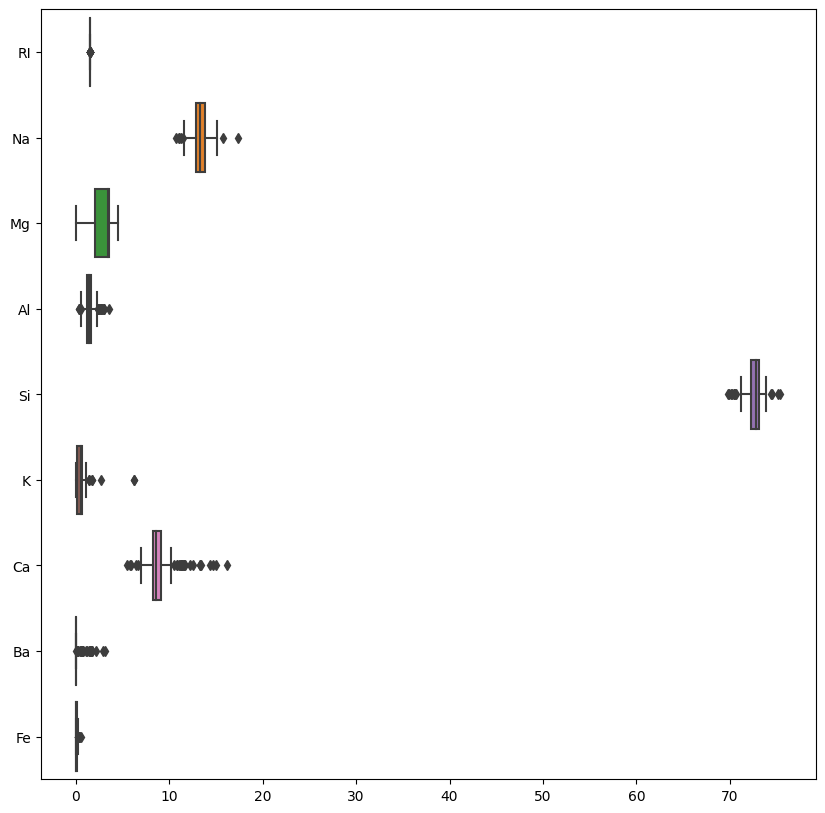

In [24]:
#boxplot
plt.figure(figsize=(10,10))
sns.boxplot(glass.iloc[:,:-1],orient='h')
plt.show()

<Axes: xlabel='RI', ylabel='Na'>

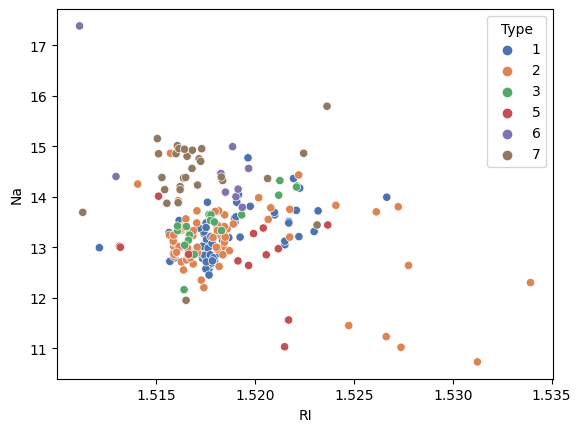

In [25]:
sns.scatterplot(x='RI',y='Na',data=glass,hue='Type',palette='deep')

# **Feature Scaling**

In [26]:
#As all features having different scale so performing feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [28]:
glass.iloc[:,:-1]=sc.fit_transform(glass.iloc[:,:-1])
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301,1
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301,1
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301,1
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301,1
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301,1
...,...,...,...,...,...,...,...,...,...,...
209,-0.699888,0.903249,-1.860172,2.891336,-0.058368,-0.642789,0.158812,1.778672,-0.588301,7
210,-0.494986,1.860605,-1.860172,1.092483,0.524398,-0.765554,-0.389506,2.844912,-0.588301,7
211,0.760865,1.173272,-1.860172,1.153118,0.990612,-0.765554,-0.361387,2.945501,-0.588301,7
212,-0.607351,1.197820,-1.860172,0.991424,1.236668,-0.765554,-0.333268,2.804676,-0.588301,7


# **KNN Model Building**

In [29]:
#spliting in x and y

In [30]:
x=glass.iloc[:,:-1]          #independent features
y=glass.iloc[:,-1]           #dependent feature

# **Spliting into Training and Testing**

In [31]:
#spliting into training and testing

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix

In [33]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=45)

In [34]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(159, 9)
(54, 9)
(159,)
(54,)


# **Building KNeighborsClassifier**

In [35]:
#kneighborsclassifier
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=4)

In [36]:
#train and test
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [37]:
print(confusion_matrix(ytest,ypred))

[[14  1  1  0  0]
 [ 6 16  0  1  0]
 [ 6  2  0  0  0]
 [ 0  0  0  0  0]
 [ 1  0  0  1  5]]


In [38]:
print(model.score(xtrain,ytrain))
print(model.score(xtest,ytest))

0.8050314465408805
0.6481481481481481


In [39]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.52      0.88      0.65        16
           2       0.84      0.70      0.76        23
           3       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         0
           7       1.00      0.71      0.83         7

    accuracy                           0.65        54
   macro avg       0.47      0.46      0.45        54
weighted avg       0.64      0.65      0.63        54



In [40]:
#Accuracy is 65%

**cross validation**

In [41]:
#cross validation
from sklearn.model_selection import KFold , cross_val_score
k=KFold(n_splits=10,shuffle=True,random_state=45)
model1=KNeighborsClassifier(n_neighbors=12)

In [42]:
result=cross_val_score(model1,x,y,cv=k)
print(result)
print(result.mean())

[0.5        0.81818182 0.63636364 0.47619048 0.52380952 0.57142857
 0.61904762 0.66666667 0.80952381 0.71428571]
0.6335497835497835


In [43]:
#accuracy we got is 63%

# **Grid Search for Algorithm Tuning**

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
print(x.head())
print(y.head())

         RI        Na        Mg        Al        Si         K        Ca  \
0  0.879840  0.289558  1.257238 -0.706370 -1.133248 -0.673480 -0.143466   
1 -0.243816  0.596403  0.639311 -0.180863  0.097037 -0.028962 -0.790201   
2 -0.716412  0.154546  0.604596  0.182950  0.433746 -0.167073 -0.825349   
3 -0.227291 -0.238216  0.701798 -0.322346 -0.058368  0.109149 -0.516041   
4 -0.306608 -0.164573  0.653197 -0.423405  0.550299  0.078457 -0.621487   

         Ba        Fe  
0 -0.353808 -0.588301  
1 -0.353808 -0.588301  
2 -0.353808 -0.588301  
3 -0.353808 -0.588301  
4 -0.353808 -0.588301  
0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64


In [46]:
#gridsearchcv
n=np.array(range(1,40))
params=dict(n_neighbors=n)
mod=KNeighborsClassifier()
grid=GridSearchCV(estimator=mod,param_grid=params)
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [47]:
print(grid.best_score_)
print(grid.best_params_)

0.6666666666666667
{'n_neighbors': 2}


In [48]:
#Accuracy we got is 0.6666666666666667 i.e 67%

# **Visualization of CV**

In [49]:
#searching for optimal value of k

In [50]:
k_range=range(1,40)
k_scores=[]
for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  scores=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
  k_scores.append(scores.mean())

In [51]:
k_scores

[0.6474025974025974,
 0.6896103896103897,
 0.670995670995671,
 0.6569264069264069,
 0.6666666666666667,
 0.6519480519480519,
 0.6287878787878788,
 0.6380952380952379,
 0.6333333333333334,
 0.6428571428571429,
 0.624025974025974,
 0.629004329004329,
 0.6099567099567099,
 0.6099567099567099,
 0.5911255411255412,
 0.5865800865800865,
 0.5818181818181818,
 0.5725108225108225,
 0.5915584415584416,
 0.5917748917748918,
 0.5870129870129871,
 0.5729437229437229,
 0.5729437229437229,
 0.5774891774891776,
 0.5774891774891776,
 0.5729437229437229,
 0.5963203463203464,
 0.5727272727272729,
 0.5725108225108226,
 0.5629870129870129,
 0.5586580086580086,
 0.5584415584415585,
 0.5632034632034632,
 0.5865800865800865,
 0.5818181818181818,
 0.5677489177489179,
 0.5818181818181818,
 0.5863636363636364,
 0.5768398268398269]

In [52]:
glass_scores=pd.DataFrame({'kvalues':range(1,40),'scores':k_scores})
glass_scores

,kvalues,scores
0,1,0.647403
1,2,0.689610
2,3,0.670996
3,4,0.656926
4,5,0.666667
5,6,0.651948
6,7,0.628788
7,8,0.638095
8,9,0.633333
9,10,0.642857


In [53]:
glass_scores.sort_values('scores',ascending=False)

,kvalues,scores
1,2,0.689610
2,3,0.670996
4,5,0.666667
3,4,0.656926
5,6,0.651948
0,1,0.647403
9,10,0.642857
7,8,0.638095
8,9,0.633333
11,12,0.629004


**Accuracy is more in k=2 and score=69%**

In [54]:
#visualization
#plot accuracy scores

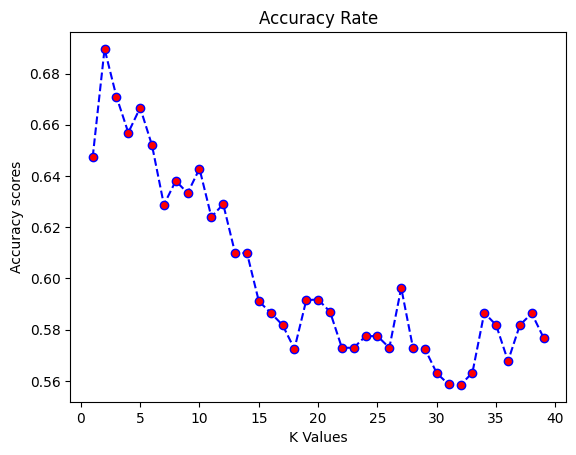

In [55]:
plt.plot(k_range,k_scores,color='blue',linestyle='--',marker='o',markerfacecolor='red')
plt.xlabel('K Values')
plt.ylabel('Accuracy scores')
plt.title('Accuracy Rate')
plt.show()

In [56]:
#Here k=2 has highest accuracy

# **Error Rate**

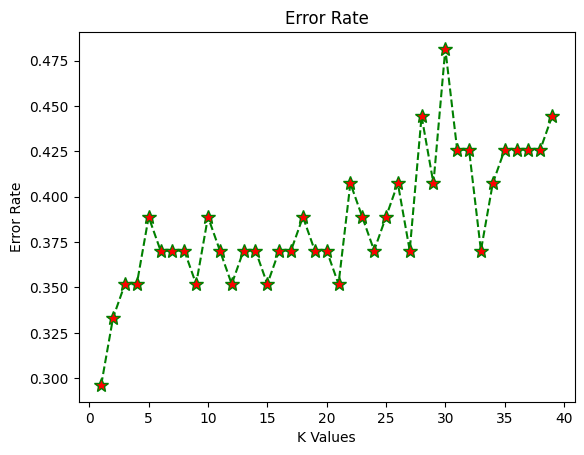

In [57]:
#Error Rate
error_rate=[]
for i in range(1,40):
  Knn=KNeighborsClassifier(n_neighbors=i)
  Knn.fit(xtrain,ytrain)
  ypred_i=Knn.predict(xtest)
  error_rate.append(np.mean(ytest!=ypred_i))


plt.plot(range(1,40),error_rate,color='green',linestyle='--',marker='*',markersize=10,markerfacecolor='red')
plt.xlabel('K Values')
plt.ylabel('Error Rate')
plt.title('Error Rate')
plt.show()

In [58]:
#Here k=1 has least error and here accuracy is consider as k=(2 or 3) because after k=(2 or 3) the error started increasing/

In [59]:
#ploting traing accuracy and testing accuracy

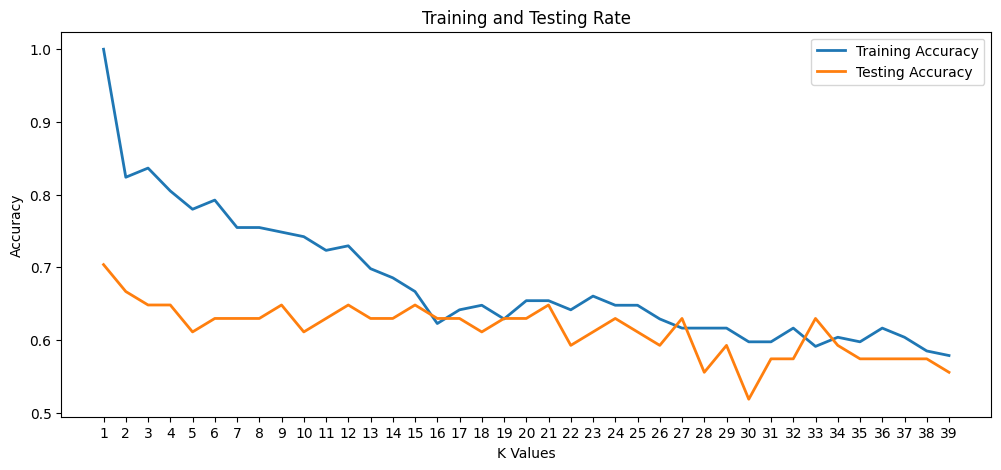

In [60]:
k_range=range(1,40)
train_accuracy=[]
test_accuracy=[]

for k in k_range:
  K=KNeighborsClassifier(n_neighbors=k)
  K.fit(xtrain,ytrain)
  train_accuracy.append(K.score(xtrain,ytrain))
  test_accuracy.append(K.score(xtest,ytest))

plt.figure(figsize=(12,5))
plt.plot(range(1,40),train_accuracy,label='Training Accuracy',linewidth=2)
plt.plot(range(1,40),test_accuracy,label='Testing Accuracy',linewidth=2)
plt.xticks(range(1,40))
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Testing Rate')
plt.show()

In [61]:
#In this training and testing accuracy plot, accuracy score is consider as k=2, because after k=2 the
#the graph is stable.

In [62]:
#Building a knn model with k=2

In [63]:
model2=KNeighborsClassifier(n_neighbors=2)
fin_result=cross_val_score(model2,x,y,cv=10)
print(fin_result)
print(fin_result.mean())

[0.72727273 0.59090909 0.86363636 0.76190476 0.66666667 0.61904762
 0.71428571 0.57142857 0.71428571 0.66666667]
0.6896103896103897


In [64]:
#best accuracy score is 0.6896103896103897 with k=2

***Accuracy Score is 69%***

In [65]:
###completed//////////

# **completed**